# Introduction to Seaborn

Seaborn is a python library for making statistical graphics. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn builds on the top of `matplotlib` and integrates closely with the data structures of pandas.

Seaborn functions help to visually explore the data. The plotting functions of Seaborn operate on pandas DataFrames and numpy arrays. Statistical aggregations necessary to produce informative plots are internally performed by seaborn plotting functions.

For using `Seaborn` plotting functions, first we need to import `seaborn` package in our workspace.


In [1]:
import seaborn as sns

## Data to be plotted

Since seaborn is a package for data visualization, data is at the core for creating visualizations.

Seaborn accepts data is several formats, however pandas DataFrame is the most common format. Seaborn provides some example datasets to get started. These data sets are essentially pandas dataframes. 

An example dataset can be loaded using `load_dataset` function.

In [2]:
tips = sns.load_dataset("tips")

In [3]:
type (tips)

pandas.core.frame.DataFrame

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Creating a visualization

Creating a visualization using Seaborn is as simple as calling a plotting function from seaborn library.

A simple example is shown below.

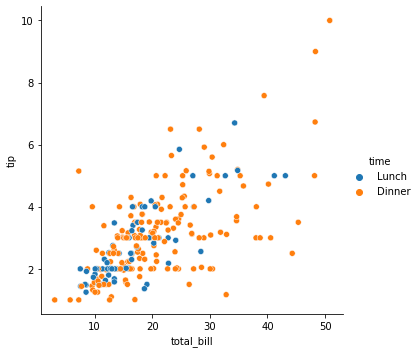

In [5]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue = "time"
)

This plot shows the relationship between three variables in the `tips` dataset using a single call to the seaborn function `relplot()`. Note that the axes labels and legend are automatically added.

### Seaborn Modules

Seaborn plotting functions are organized into ***modules***. The plotting functions within a module are designed to achieve similar visualization goals. 

There are modules such as *relational*, *distributions*, and *categorical*. 

* Each module has a single *figure-level* function.
* Each module has a set of *axes-level* functions.

Thus, the organization of functions in Seaborn looks as shown in the following figure.
![](function_overview_8_0.png)
Here `relplot`, `displot`, and `catplot` are the figure-level functions in the three modules relational, distributions, and categorical respectively. Whereas `scatterplot` and `lineplot` are the axes-level functions within relational mudule.

### The Modules

* **Relational Plots** : Plots in this module show the the relationship between two or more variables.
* **Distribution Plots** : Plots in these module provide several approaches for visualizing the univariate or bivariate distribution of data.
* **Categorical Plots** : Plots in this module provide different approaches of visualizing categorical data.

## Figure Level functions

Figure-level functions utilizes matplotlib functionality through a seaborn object that manages the figure. This seaborn object is mostly a `FacetGrid` object. Each figure-level function provides a common interface to various axes-level functions within its module. 

The default behavior of each figure level function is to use one of its axes-level functions. For example, the figure-level function `relplot` uses the axes-level function `scatterplot` by default.

Given below is an example of another figure-level function `displot`.

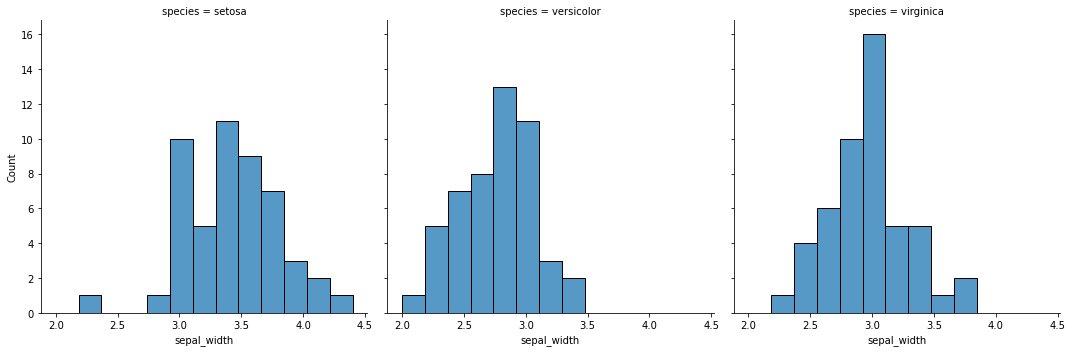

In [6]:
iris = sns.load_dataset("iris")
sns.displot(data=iris, x = "sepal_width", col = "species")

Note that the `displot` function uses the axes-level function `histplot` by default. 

* A different axes-level function can be specified using the `kind` argument. For example, instead of using `histplot` we can use `kdeplot` as shown in the next example.

* The most useful feature provided by the figure-level functions is that they can create figures with multiple subplots, as shown in above example.

The `load_dataset` function used above loads the specified example dataset from online repository. Thus, internet connectivity is required for this function to work.The available datasets can be seen using the function `get_dataset_names`.

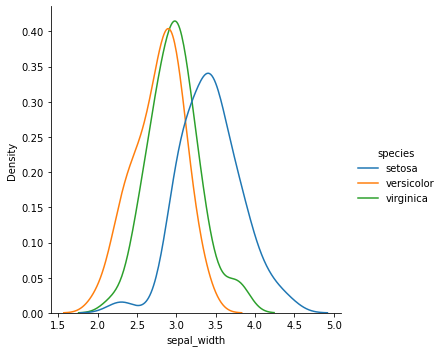

In [7]:
sns.displot(data=iris, x = "sepal_width", hue = "species", kind = "kde")

Direct use of `kdeplot` function produces a similar plot with some minor differences. For example, the legend is shown within the plot.

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

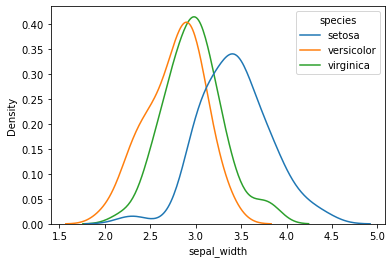

In [8]:
sns.kdeplot(data=iris, x = "sepal_width", hue = "species")

### `lmplot`

This is another figure level function that provides a convenient interface to fit regression models across conditional subsets of a dataset. This function combines `regplot` and `FacetGrid` to achieve its objectives. 

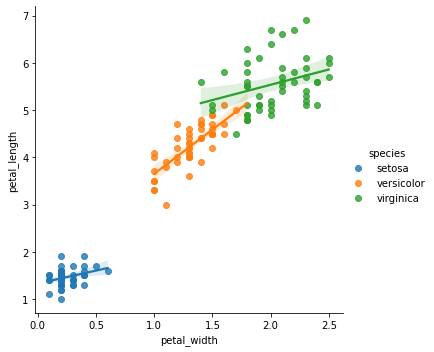

In [9]:
sns.lmplot(x="petal_width", y="petal_length", hue = "species", data=iris)

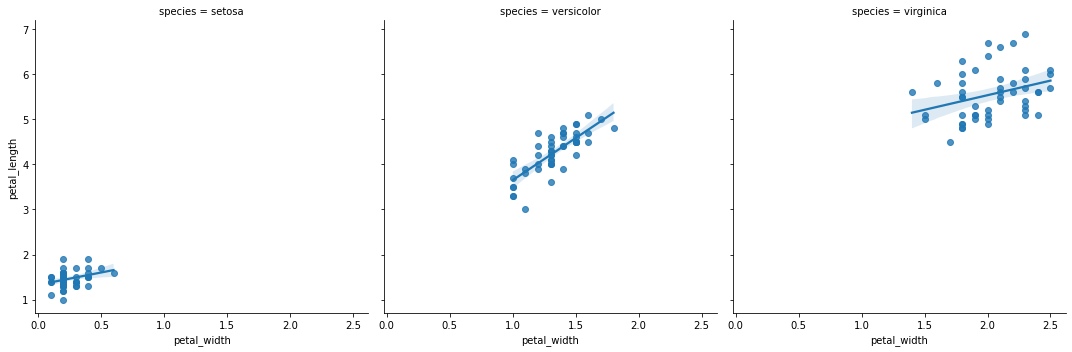

In [10]:
sns.lmplot(x="petal_width", y="petal_length", col = "species", data=iris)

### Axes-level functions

The axes-level functions are written to act like replacements for corresponding matplotlib functions. They add elements like axes labels and legend automatically.

* Axes-level functions draw their plot on the currently active axes. 
* However, they accept `ax` argument to draw the plot on the specified axes.

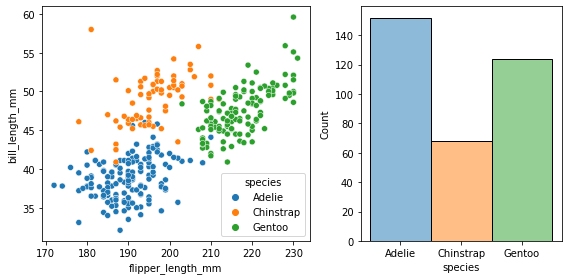

In [11]:
penguins = sns.load_dataset("penguins")
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", legend = False, ax=axs[1])
fig.tight_layout()

There are several other axes-level functions with most of them organized into modules as discussed above.

## Customizing Plots from a figure-level functions

The figure-level functions return a `FacetGrid` object, which has methods for customizing attributes of the plot.

For example, one can change the labels on the axes using a single line of code as shown below.

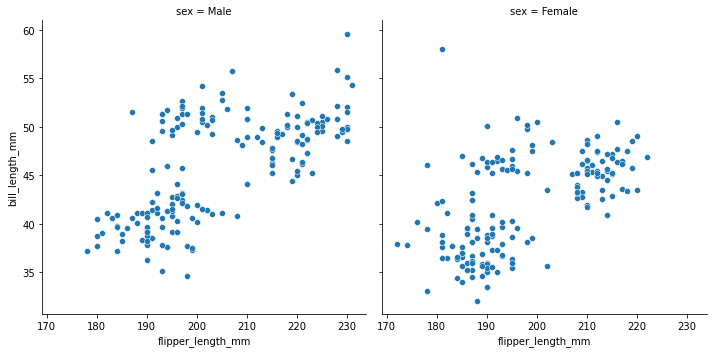

In [12]:
fg = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
fg

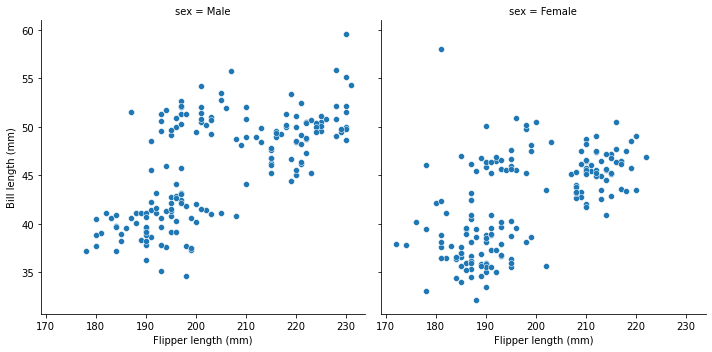

In [13]:
fg.set_axis_labels("Flipper length (mm)", "Bill length (mm)")
fg.figure

Figure-level functions also accept `height` and `aspect` arguments that specify the size of each subplot within figure.


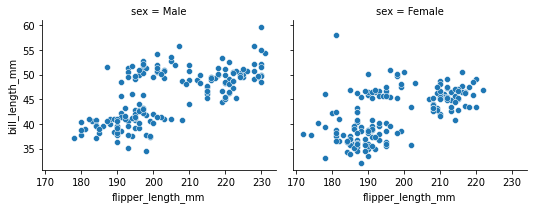

In [14]:
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex", height = 3, aspect  = 1.25)

## Combining multiple plots

Seaborn provides multi-plot grids to combine multiple plots into a single figure. These are

* Facet Grids\
  Facet grids are used by the figure-level functions discussed above.
  
* Joint Grids\
  Joint grids are used by the `jointplot` function.
  
* Pair Grids\
  Pair grids are used by the `pairplot` function.
  
All these functions are the *figure-level* functions. However, `pairplot` and `jointplot` functions combine multiple kinds of plots from different modules. Thus, these two functions dont fit into the classification discussed above.

### `jointplot`

This function draws a plot of two variables with both, bivariate and univariate graphs in the same figure.

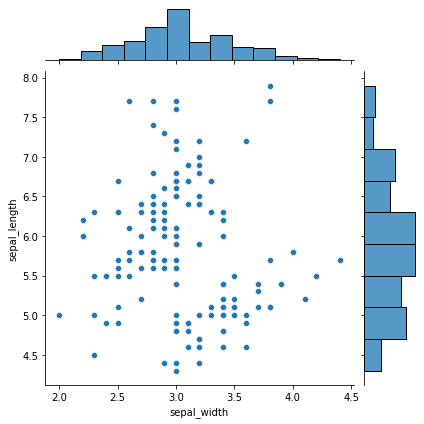

In [15]:
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length")

We can use `hue` argument to distinguish between the subsets of data.

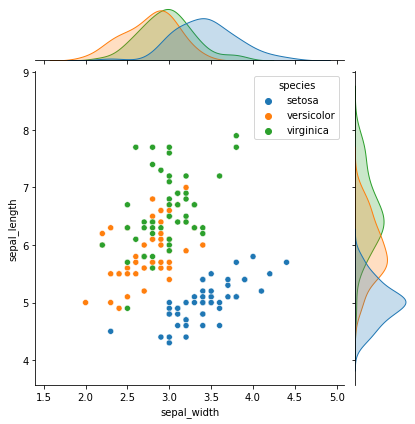

In [16]:
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

It may be noted that on specifying the `hue` argument, the kind of marginal plot has changed.

### `pairplot`

This *figure-level* function plots pairwise relationships between numeric variables in a dataset. A grid of Axes is used with each numerical variable represented in a row as well as a column.
* The off-diagonal axes in the grid represent bivariate graph (scatter plot by default)
* The diagonal axes in the grid represent univariate graph

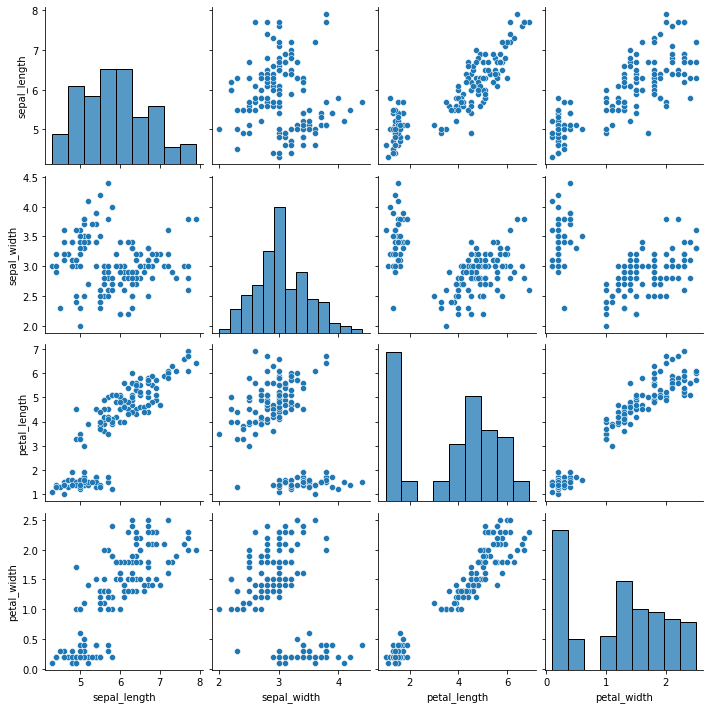

In [17]:
sns.pairplot(data=iris)

As earlier, we can use `hue` argument to distinguish between the species.

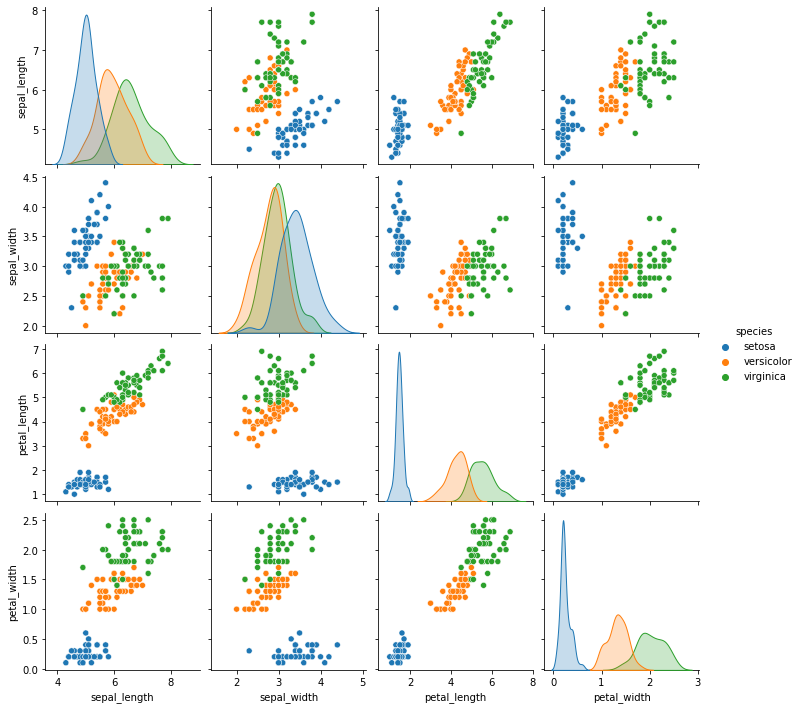

In [18]:
sns.pairplot(data=iris, hue = "species")

Again note that the kind of univariate plot has changed on specifying the `hue` argument.

## Matrix Plots

### `heatmap`

This is an Axes-level function that plots rectangular data as a color-encoded matrix. It can be used to visualize matrices such as correlation matrix and two-way contingency table.

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


<AxesSubplot:>

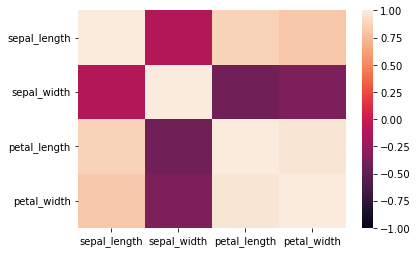

In [18]:
print(iris.corr())
sns.heatmap(iris.corr(), vmin=-1, vmax=1)

We can also display the plotted values as shown below.

<AxesSubplot:>

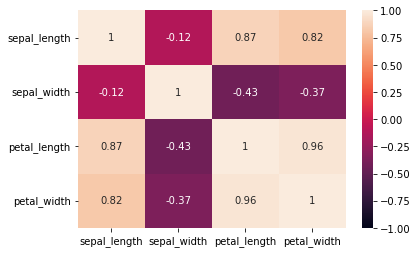

In [19]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot = True)

### `clustermap`

This function plots a matrix dataset as a hierarchically-clustered heatmap.

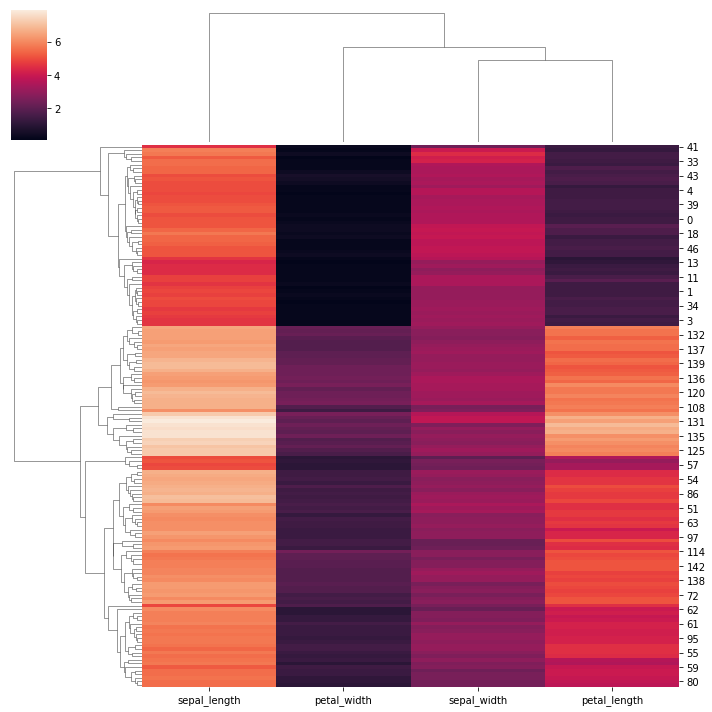

In [20]:
sns.clustermap(iris.drop("species", axis = 1))

## Figure aesthetics

Aesthetics of the figure is very important, aspecially while communicating the results. Visualizations with better aesthetics are able to convey the information more effectively.

Seaborn provides a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

### Figure Styles

There are five preset seaborn themes: 

* darkgrid (default)
* whitegrid
* dark
* white
* ticks

To see the look and feel of different styles, let use each one of these below using `set_style` function.

#### darkgrid

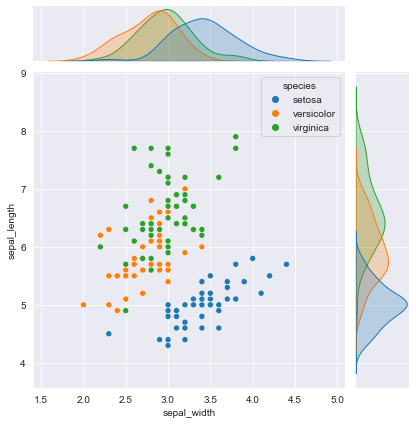

In [21]:
sns.set_style("darkgrid")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

#### whitegrid

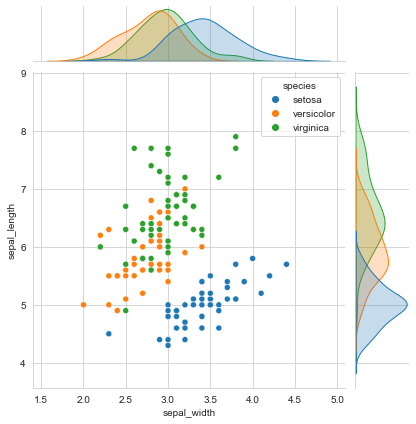

In [22]:
sns.set_style("whitegrid")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

#### dark

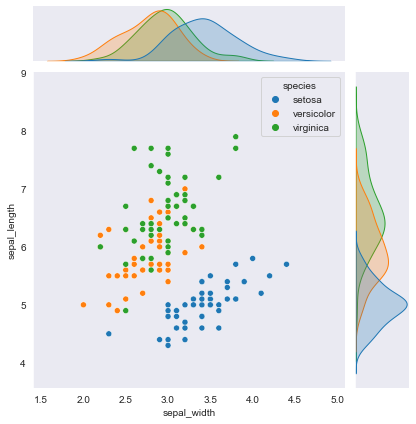

In [23]:
sns.set_style("dark")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

#### white

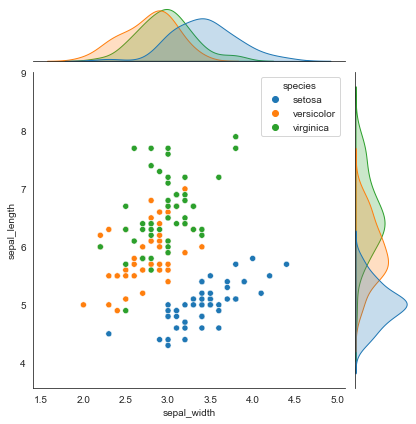

In [24]:
sns.set_style("white")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

#### ticks

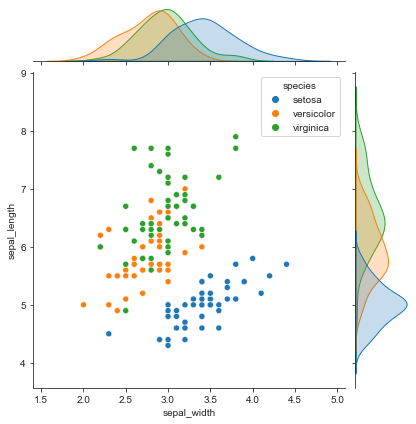

In [25]:
sns.set_style("ticks")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

### matplotlib rcParams system

Seaborn styles achieve the results through the matplotlib rcParams systems.

matplotlib uses `matplotlibrc` configuration files to customize all kinds of properties. These properties are called *rc parameters*. There are large number of rc parameters to control almost every aspect of the plots generated by matplotlib. The default rc parameters settings can be seen as follows.

In [26]:
from matplotlib import rcParams
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.forma

In [27]:
len(rcParams)

310

Note that there are 310 rc parameters!

With such a large number of rc parameters, it can be hard to know what settings to tweak to achieve an attractive plot.  Seaborn provides a high-level interface for controlling the look of matplotlib figures.

### Customizing seaborn styles

To see the parameters included in a specific style, we can call `axes_style` function without parameters.

In [28]:
sns.set_style("darkgrid")
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

To customize a seaborn style, you can pass a dictionary of parameters to the `rc` argument `set_style`. Note that, through this method, you can only override the parameters that are *part of the style definition*.

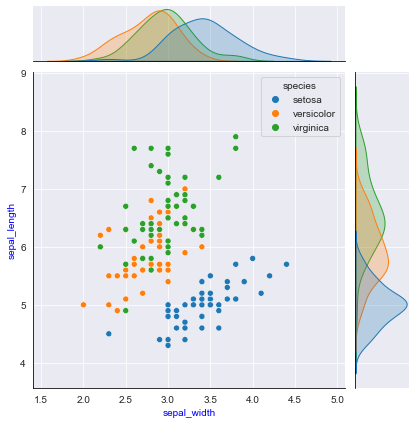

In [29]:
sns.set_style("darkgrid", rc = {'axes.edgecolor':"black", 'axes.labelcolor': 'blue'})
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

### Setting the context

Seaborn provides four preset contexts

* paper
* notebook
* talk
* poster

A context affects the things like the size of the labels, lines, and other elements of the plot, without changing the style.

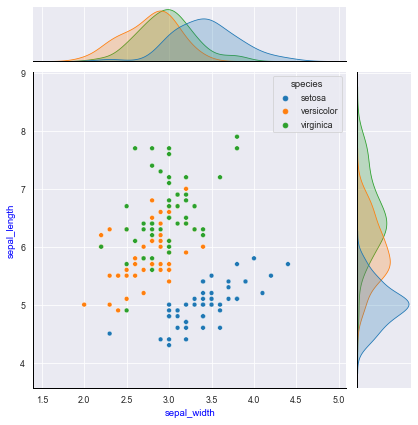

In [30]:
sns.set_context("paper")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

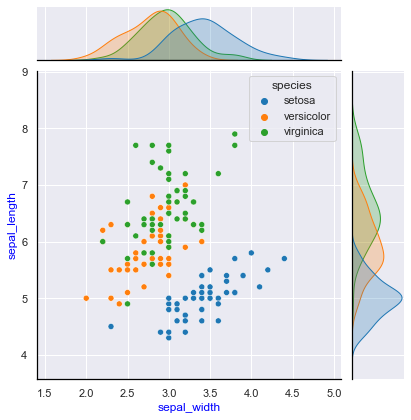

In [31]:
sns.set_context("notebook")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

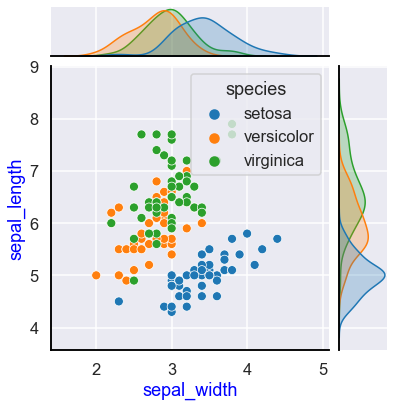

In [32]:
sns.set_context("talk")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

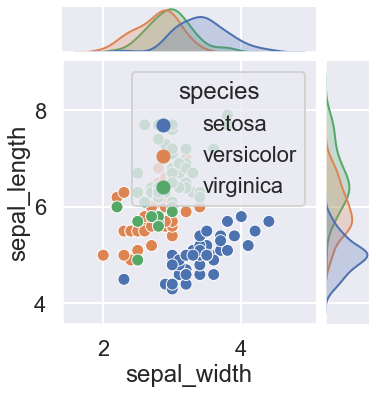

In [33]:
sns.set_theme(context = "poster")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

To avoid legend overlaping the plot contents, we can change the font size for legend as shown below. Note that the `rc` argument can only change the rc parameters affecting the context settings. 

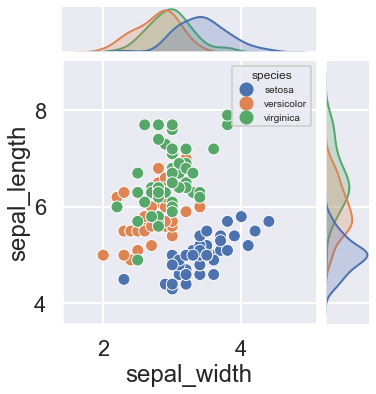

In [34]:
sns.set_theme(context = "poster", rc = {'legend.fontsize': 10.0, 'legend.title_fontsize': 12.0})
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species")

To see the parameters affecting the context setting, we can use the `plotting_context` function without arguments as shown below.

In [35]:
sns.plotting_context()

{'font.size': 24.0,
 'axes.labelsize': 24.0,
 'axes.titlesize': 24.0,
 'xtick.labelsize': 22.0,
 'ytick.labelsize': 22.0,
 'legend.fontsize': 10.0,
 'axes.linewidth': 2.5,
 'grid.linewidth': 2.0,
 'lines.linewidth': 3.0,
 'lines.markersize': 12.0,
 'patch.linewidth': 2.0,
 'xtick.major.width': 2.5,
 'ytick.major.width': 2.5,
 'xtick.minor.width': 2.0,
 'ytick.minor.width': 2.0,
 'xtick.major.size': 12.0,
 'ytick.major.size': 12.0,
 'xtick.minor.size': 8.0,
 'ytick.minor.size': 8.0,
 'legend.title_fontsize': 12.0}

Alternatively, we can change the figure size by specifying height argument of the `jointplot` function. It may be noted that the jointplot function always produces a square figure.

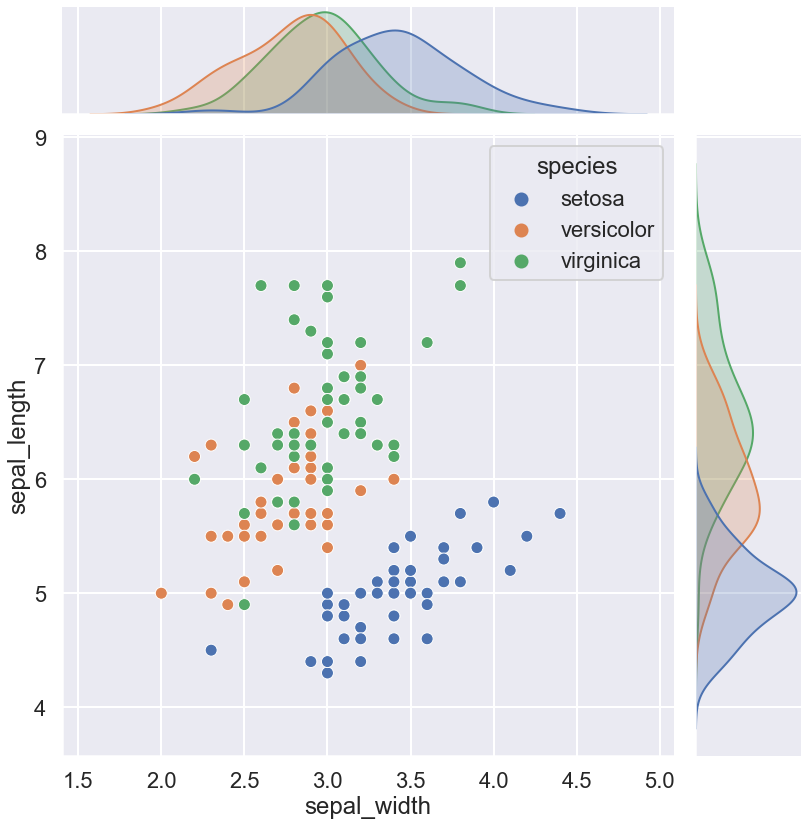

In [36]:
sns.set_context("poster")
sns.jointplot (data = iris, x = "sepal_width", y = "sepal_length", hue = "species", height = 12)

In [39]:
dir(fg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes',
 '_axes_dict',
 '_bottom_axes',
 '_col_var',
 '_col_wrap',
 '_colors',
 '_dropna',
 '_extract_legend_handles',
 '_facet_color',
 '_facet_plot',
 '_figure',
 '_finalize_grid',
 '_get_palette',
 '_hue_var',
 '_inner_axes',
 '_left_axes',
 '_legend',
 '_legend_data',
 '_legend_out',
 '_margin_titles',
 '_margin_titles_texts',
 '_n_facets',
 '_ncol',
 '_not_bottom_axes',
 '_not_left_axes',
 '_not_na',
 '_nrow',
 '_row_var',
 '_tight_layout_pad',
 '_tight_layout_rect',
 '_update_legend_data',
 '_x_var',
 '_y_var',
 'add_legend',
 'ax',
 'axes',
 'axes_dict',
 'col_names',
 'data',
 'despine',
 'facet_axis',
 'facet_da